## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice.
total_mice = len(mouse_merge_df["Mouse ID"].value_counts())

mouse_count =pd.DataFrame({"Number of Mice": [total_mice]})
mouse_count

,Number of Mice
0,249


In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = mouse_merge_df.loc[mouse_merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
duplicated_mouse

array(['g989'], dtype=object)

In [37]:
duplicated_data = mouse_merge_df.loc[mouse_merge_df["Mouse ID"]=="g989"]
clean_data = mouse_merge_df.loc[mouse_merge_df["Mouse ID"]!="g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
total_mouse  = len(clean_data["Mouse ID"].unique())
total_mouse

248

In [39]:
# Checking the number of mice in the clean DataFrame.
mouse_count =pd.DataFrame({"Number of Mice": [total_mouse]})
mouse_count

,Number of Mice
0,248


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_group = clean_data.groupby(["Drug Regimen"])

mean = round(drug_regimen_group["Tumor Volume (mm3)"].mean(),2)
median = round(drug_regimen_group["Tumor Volume (mm3)"].median(),2)
variance = round(drug_regimen_group["Tumor Volume (mm3)"].var(),2)
standard_deviation = round(drug_regimen_group["Tumor Volume (mm3)"].std(),2)
sem = round(drug_regimen_group["Tumor Volume (mm3)"].sem(),2)

summary_statistics_df =  pd.DataFrame({"Mean": mean,
                                      "Median": median,
                                      "Variance": variance,
                                       "Standard Deviation":  standard_deviation,
                                      "SEM": sem
                                     })

summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [41]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_statistics = drug_regimen_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

variable_names= drug_summary_statistics.rename(columns={"mean":"Mean", "median":"Median", "var": "Variance", "std": "Standard Deviation", "sem":"SEM"})
variable_names

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [42]:
measurement_numbers=clean_data.groupby(["Drug Regimen"])["Mouse ID"].count()
measurement_numbers

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

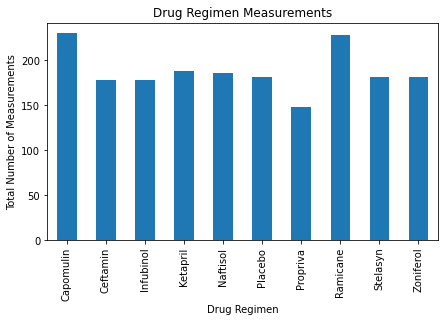

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#http://localhost:8812/notebooks/1/Activities/13-Stu_AvgRain-BarChartsWithPandas/Solved/avg_state_rain.ipynb

measurement_numbers.plot.bar(figsize=(7,4))

plt.title("Drug Regimen Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

plt.show()


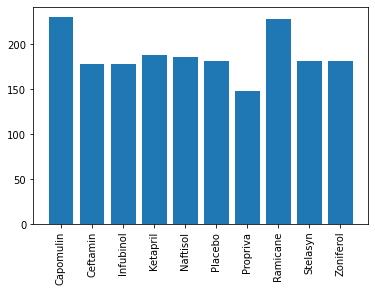

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(measurement_numbers.index.values, measurement_numbers.values)
plt.xticks(rotation=90)
plt.show()

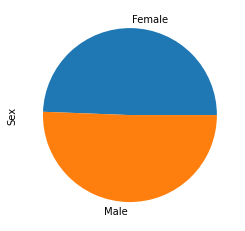

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count_pandas=mouse_merge_df.groupby(["Sex"])["Sex"].count()
gender_count_pandas.plot.pie()



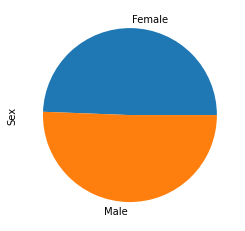

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count_pandas.values, labels = gender_count_pandas.index.values)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data.groupby(["Mouse ID"]).max()["Timepoint"]
max_tumor = max_tumor.reset_index()
max_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_data, on = ["Mouse ID", "Timepoint"], how = "left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment : 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data.loc[merged_data ["Drug Regimen"]==drug, ["Tumor Volume (mm3)"]]
    
    
    # add subset 
    tumor_vol.append(tumor_volume)

    

tumor_vol


[     Tumor Volume (mm3)
 19            38.982878
 24            38.939633
 61            30.485985
 64            37.074024
 66            40.159220
 80            47.685963
 83            37.311846
 85            38.125164
 87            38.753265
 108           41.483008
 115           38.846876
 121           28.430964
 124           33.329098
 162           46.539206
 163           32.377357
 169           41.581521
 174           23.343598
 180           40.728578
 183           34.455298
 192           31.023923
 204           40.658124
 208           39.952347
 220           36.041047
 226           28.484033
 239           31.896238,
      Tumor Volume (mm3)
 6             38.407618
 7             43.047543
 10            38.810366
 12            32.978522
 33            38.342008
 37            33.397653
 45            37.311236
 52            40.659006
 70            29.128472
 76            33.562402
 77            36.374510
 91            31.560470
 93            36.134852

In [53]:
        #Determine outliers using upper and lower bounds
        # If the data is in a dataframe, we use pandas to give quartile calculations

treatment_outlier = tumor_vol.loc[(merged_data['Drug Regimen'] < lower_bound) | (tumor_vol['Drug Regimen'] > upper_bound)]
treatment_outlier

AttributeError: 'list' object has no attribute 'loc'

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
quartiles = tumor_vol['Drug Regimen'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


TypeError: list indices must be integers or slices, not str

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin




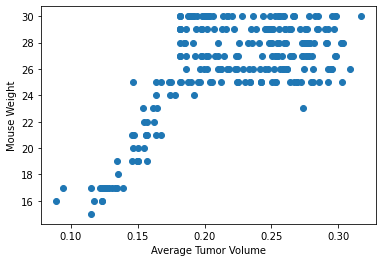

0      0.274086
1      0.264217
2      0.285152
3      0.254030
4      0.255809
         ...   
243    0.196414
244    0.123543
245    0.253042
246    0.265085
247    0.297854
Name: Tumor Volume (mm3), Length: 248, dtype: float64

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_volume = merged_data['Tumor Volume (mm3)'] / total_mouse

x_values = average_volume
y_values = merged_data['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.show()
average_volume

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_mouse_weight = merged_data.iloc[:,5]
corr_mouse_weight = merged_data.iloc[:,6]
correlation = st.pearsonr(corr_mouse_weight,corr_mouse_weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 1.0


The correlation between both factors is 1.0


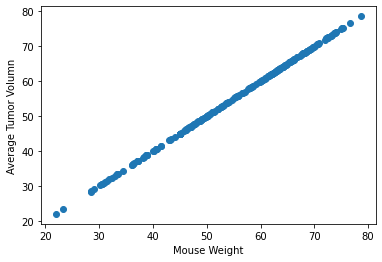

In [18]:
plt.scatter(corr_mouse_weight,corr_mouse_weight)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volumn')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()